In [27]:
import numpy as np # linear algebra
import pandas as pd

In [28]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("social media influencers-INSTAGRAM - -DEC 2022.csv")
df

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M
...,...,...,...,...,...,...,...,...,...
995,996,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K
996,997,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K
997,998,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K
998,999,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K


In [31]:
df["Followers"]=df["followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df["Engagement Avg"]=df["Eng. (Avg.)"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df.drop(['followers','Eng. (Avg.)','Category_2','Eng. (Auth.)','instagram name','Rank'],axis=1,inplace=True)

In [32]:
df =df.rename(columns = {'Category_1':'Category','name':'Name','country':'Country'})
df

,Name,Category,Country,Followers,Engagement Avg
0,leomessi,Sports with a ball,Argentina,409800000,23400000
1,cristiano,Sports with a ball,India,523000000,14700000
2,neymarjr,Sports with a ball,Brazil,198900000,9500000
3,kyliejenner,Fashion,United States,376300000,4300000
4,kendalljenner,Modeling,United States,268000000,5000000
...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700
996,soycintiacossio,Modeling,Colombia,6000000,390600
997,feat.dino,Lifestyle,South Korea,2700000,876400
998,djokernole,Sports with a ball,United States,11800000,197500


In [33]:
df.isnull().sum()

Name               0
Category          50
Country            1
Followers          0
Engagement Avg     0
dtype: int64

In [34]:
df=df.fillna('None')
df

,Name,Category,Country,Followers,Engagement Avg
0,leomessi,Sports with a ball,Argentina,409800000,23400000
1,cristiano,Sports with a ball,India,523000000,14700000
2,neymarjr,Sports with a ball,Brazil,198900000,9500000
3,kyliejenner,Fashion,United States,376300000,4300000
4,kendalljenner,Modeling,United States,268000000,5000000
...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700
996,soycintiacossio,Modeling,Colombia,6000000,390600
997,feat.dino,Lifestyle,South Korea,2700000,876400
998,djokernole,Sports with a ball,United States,11800000,197500


In [35]:
df['Engagement Rate']=np.round((df['Engagement Avg']/df['Followers'])*100,3)
df

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710
1,cristiano,Sports with a ball,India,523000000,14700000,2.811
2,neymarjr,Sports with a ball,Brazil,198900000,9500000,4.776
3,kyliejenner,Fashion,United States,376300000,4300000,1.143
4,kendalljenner,Modeling,United States,268000000,5000000,1.866
...,...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700,2.141
996,soycintiacossio,Modeling,Colombia,6000000,390600,6.510
997,feat.dino,Lifestyle,South Korea,2700000,876400,32.459
998,djokernole,Sports with a ball,United States,11800000,197500,1.674


In [36]:
Target = []
for value in df["Engagement Rate"]:
    if value < 3.5:
        Target.append(0)
    else:
        Target.append(1)



df["Target"] = Target
df

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate,Target
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710,1
1,cristiano,Sports with a ball,India,523000000,14700000,2.811,0
2,neymarjr,Sports with a ball,Brazil,198900000,9500000,4.776,1
3,kyliejenner,Fashion,United States,376300000,4300000,1.143,0
4,kendalljenner,Modeling,United States,268000000,5000000,1.866,0
...,...,...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700,2.141,0
996,soycintiacossio,Modeling,Colombia,6000000,390600,6.510,1
997,feat.dino,Lifestyle,South Korea,2700000,876400,32.459,1
998,djokernole,Sports with a ball,United States,11800000,197500,1.674,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop(['Target','Name','Category','Country',], axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_list =['Logistic Regression','SVM','KNN','Decision Tree','random Forest','Naive Bayes']
acc_list = []
cm_list = []
c_report = []
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    cm_list.append(confusion_matrix(y_test,y_pred))
    c_report.append(classification_report(y_test,y_pred))

c_report

['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       102\n           1       1.00      1.00      1.00        98\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n',
 '              precision    recall  f1-score   support\n\n           0       0.80      0.75      0.78       102\n           1       0.76      0.81      0.78        98\n\n    accuracy                           0.78       200\n   macro avg       0.78      0.78      0.78       200\nweighted avg       0.78      0.78      0.78       200\n',
 '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94       102\n           1       1.00      0.88      0.93        98\n\n    accuracy                           0.94       200\n   macro avg       0.95      0.94      0.94       200\nweighted avg       0.95      0.94      0.

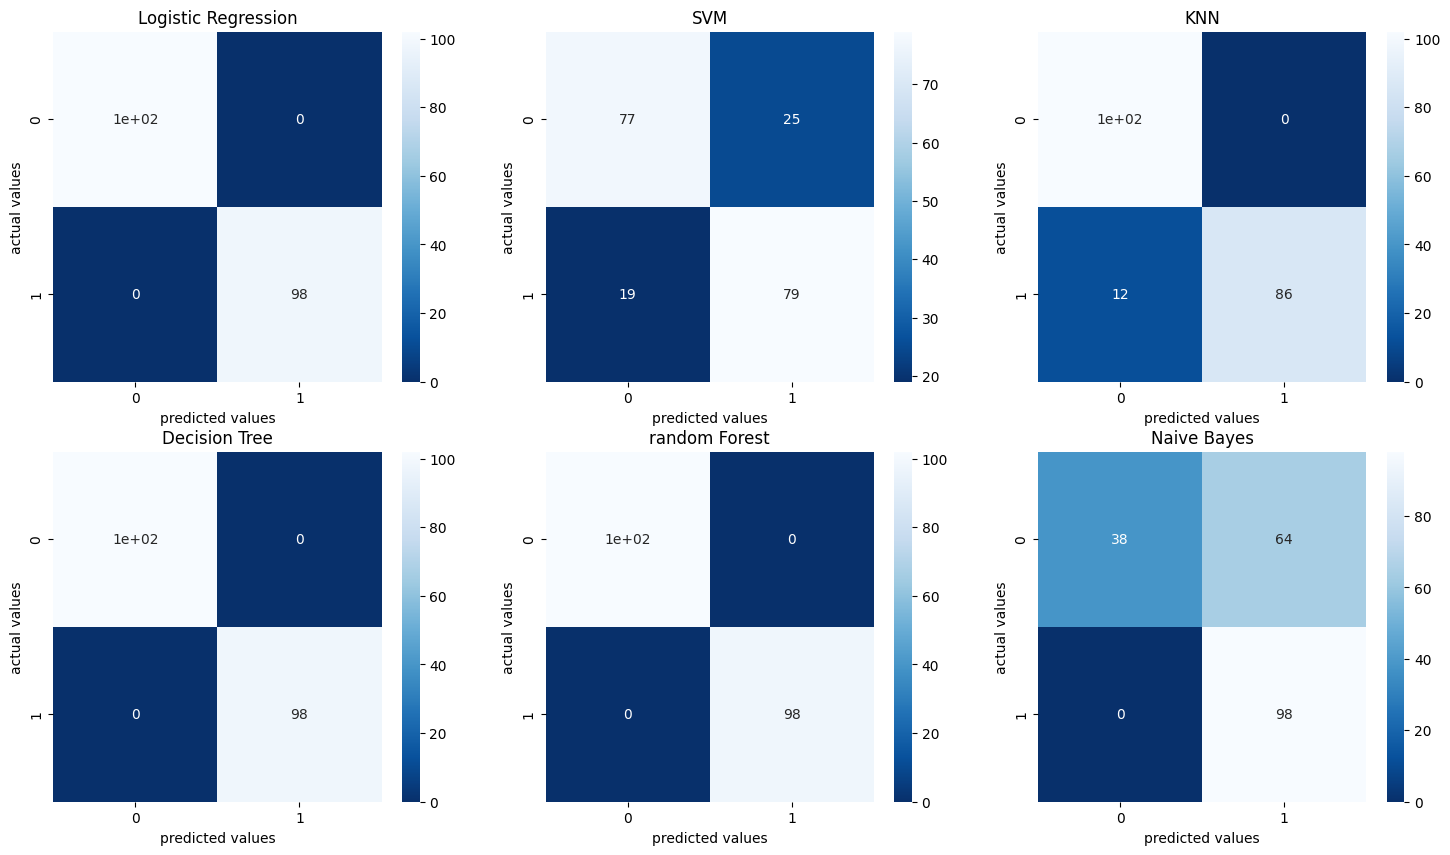

In [40]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot=True,cmap="Blues_r")
    cm_plot.set_xlabel('predicted values')
    cm_plot.set_ylabel('actual values')

In [41]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list})
result_df

,Model,Accuracy
0,Logistic Regression,1.00
1,SVM,0.78
2,KNN,0.94
3,Decision Tree,1.00
4,random Forest,1.00
5,Naive Bayes,0.68
